In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf


plt.rcParams['axes.grid'] = True

np.random.seed(555)
n = 300
t = np.arange(n)

rolling_window = 30

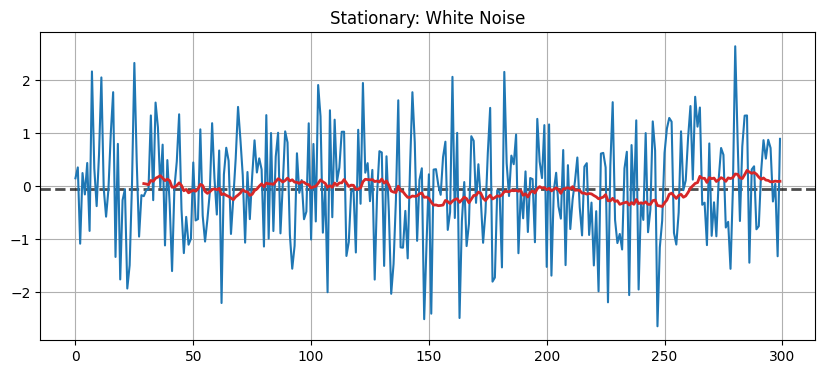

In [89]:
# gaussian white noise
# mean = constant around 0
# variance = constant
# no-trend, no-seasonality
white_noise = pd.Series(np.random.normal(0, 1, n))
s1_mean = white_noise.mean()
s1_rolling_mean = white_noise.rolling(rolling_window).mean()

plt.figure(figsize=(10, 4))
plt.axhline(s1_mean, linestyle="--", linewidth=2, color="black", alpha=0.7)
plt.plot(white_noise)
plt.plot(s1_rolling_mean, color="tab:red", linewidth=2, label=f"Rolling Mean ({rolling_window})")
plt.title("Stationary: White Noise")
plt.show()

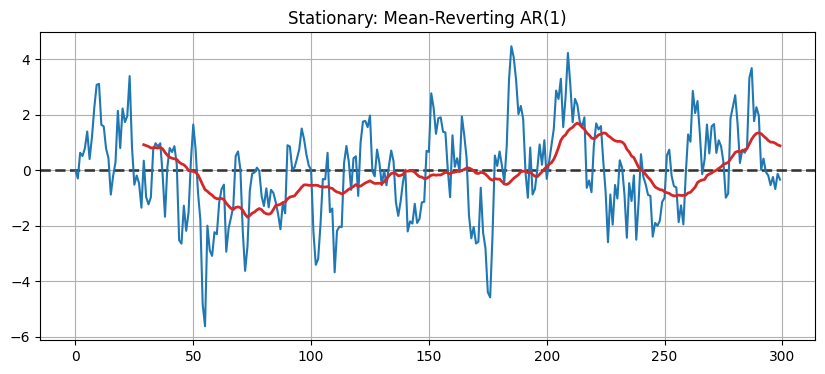

In [90]:
# mean reverting process AR(1)
# phi = how much yesterday matter today (stronger phi stronger memory)
# AR(1) is a model assumption about the data not transformation

# fluctuates around a fixed mean
# shocks die over-time
# autocorrelated but stable
phi = 0.75
ar = [0]
for i in range(1, n):
    # Y_t = c + Φ.Y_t-1 + ε
    ar.append(phi * ar[i-1] + np.random.normal(0, 1))

ar_series = pd.Series(ar)
s2_mean = ar_series.mean()
s2_rolling_mean = ar_series.rolling(rolling_window).mean()

plt.figure(figsize=(10, 4))
plt.axhline(s2_mean, linestyle="--", linewidth=2, color="black", alpha=0.7)
plt.plot(ar_series)
plt.plot(s2_rolling_mean, color="tab:red", linewidth=2, label=f"Rolling Mean ({rolling_window})")
plt.title("Stationary: Mean-Reverting AR(1)")
plt.show()


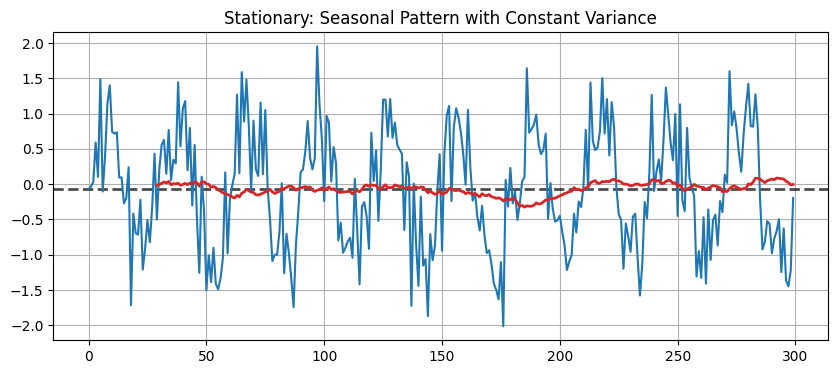

In [91]:
# mean and vairance don't drift
# clear seasonal patterns with constant amplitude
seasonal_stationary = pd.Series(
    # sine wave with gaussian noise
    np.sin(2 * np.pi * t / 30) + np.random.normal(0, 0.5, n)
)
s3_mean = seasonal_stationary.mean()
s3_rolling_mean = seasonal_stationary.rolling(rolling_window).mean()

plt.figure(figsize=(10, 4))
plt.axhline(s3_mean, linestyle="--", linewidth=2, color="black", alpha=0.7)
plt.plot(seasonal_stationary)
plt.plot(s3_rolling_mean, color="tab:red", linewidth=2, label=f"Rolling Mean ({rolling_window})")
plt.title("Stationary: Seasonal Pattern with Constant Variance")
plt.show()


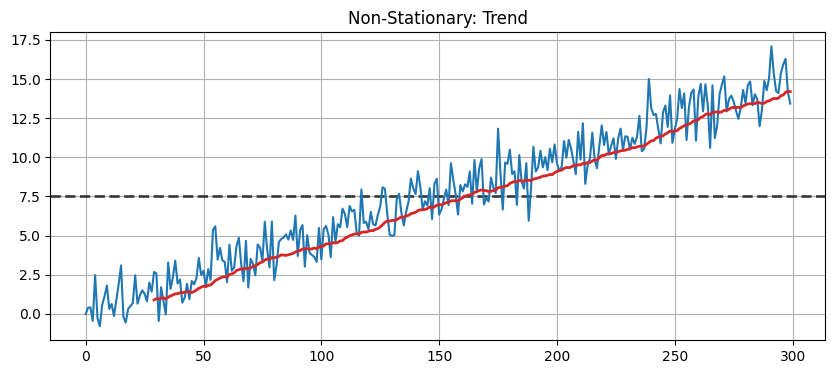

In [92]:
# mean increase overtime
trend = pd.Series(0.05 * t + np.random.normal(0, 1, n))
ns1_mean = trend.mean()
ns1_rolling_mean = trend.rolling(rolling_window).mean()

plt.figure(figsize=(10, 4))
plt.axhline(ns1_mean, linestyle="--", linewidth=2, color="black", alpha=0.7)
plt.plot(trend)
plt.plot(ns1_rolling_mean, color="tab:red", linewidth=2, label=f"Rolling Mean ({rolling_window})")
plt.title("Non-Stationary: Trend")
plt.show()


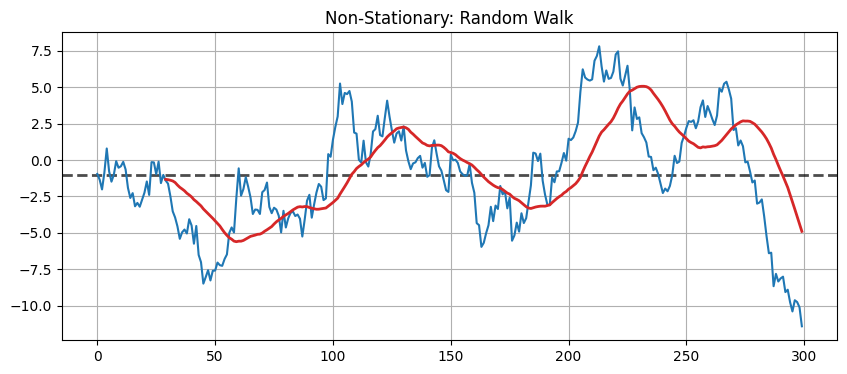

In [93]:
# variance increasaes with time
# shocks (noises) are permanent
# no mean reversion

# x_t = x_t-1 + ε_t
random_walk = pd.Series(np.cumsum(np.random.normal(0, 1, n)))
ns2_mean = random_walk.mean()
ns2_rolling_mean = random_walk.rolling(rolling_window).mean()

plt.figure(figsize=(10, 4))
plt.axhline(ns2_mean, linestyle="--", linewidth=2, color="black", alpha=0.7)
plt.plot(random_walk)
plt.plot(ns2_rolling_mean, color="tab:red", linewidth=2, label=f"Rolling Mean ({rolling_window})")
plt.title("Non-Stationary: Random Walk")
plt.show()


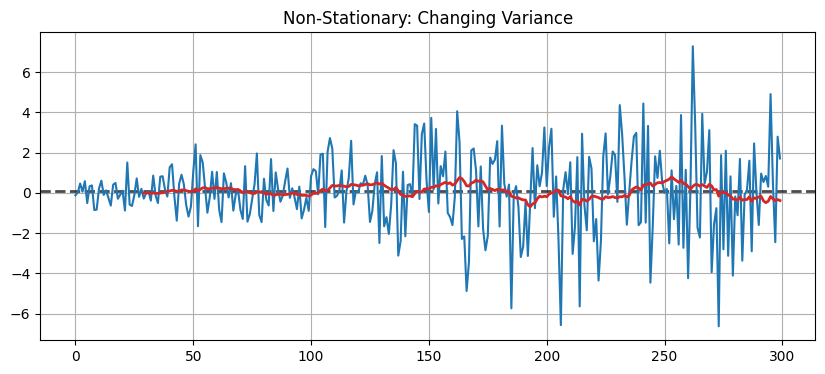

In [94]:
# variance explods overtime
changing_var = pd.Series(
    np.random.normal(0, np.linspace(0.5, 3, n))
)
ns3_mean = changing_var.mean()
ns3_rolling_mean = changing_var.rolling(rolling_window).mean()

plt.figure(figsize=(10, 4))
plt.axhline(ns3_mean, linestyle="--", linewidth=2, color="black", alpha=0.7)
plt.plot(changing_var)
plt.plot(ns3_rolling_mean, color="tab:red", linewidth=2, label=f"Rolling Mean ({rolling_window})")
plt.title("Non-Stationary: Changing Variance")
plt.show()


#Autocorrelation

How similar the series is to the lagged version of itself.\
Autocorrelation measures memory

Lag_1 = Corr(Y_t, Y_t - 1)\
Lag_k = Corr(Y_t, Y_t - k)


#### Interpretations
- `Positive autocorr`: past values move in the same direction - trend
- `Negative autocorr`: past values move in the opposite direction - oscillation
- `Near Zero`: no linear dependence

- `High at lag_1`: Short-term memory
- `High at seasonal lags`: Seasonality
- `Slow decay` - Trend or non-stationary 

#Autocorrelation Function

Autocorrelation computed for many lags\
ACF Plot => Autocorrelation values from `lag 0` up to `k`


- `X-axis`: lags
- `Y-axis`: correlation stength
- `Vertical Bars`: Sample autocorrelation at that point
- `Horizontal Bars`: Cofidence bounds
  - `bars outside` -> statistically significant
  - `bars inside`  -> typically just noise

In [95]:
# lags = offset
def plot_series_and_acf(series, title, lags=30):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Left: time series
    axes[0].plot(series, color="tab:blue")
    axes[0].set_title(title)
    axes[0].set_xlabel("t")

    # Right: ACF
    plot_acf(series, lags=lags, ax=axes[1])
    axes[1].set_title("ACF")

    plt.tight_layout()
    plt.show()

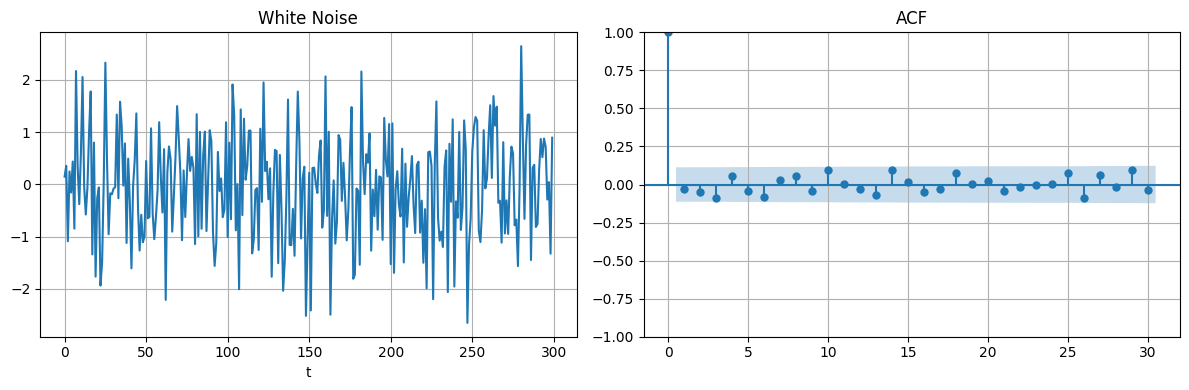

In [96]:
# bars are near 0 for all lags
# most bars stays inside the confidence bands

# today data tells you nth about the past values
# past values are useless
# don't forecast there's no implications
# literal white-noise
plot_series_and_acf(white_noise, "White Noise")

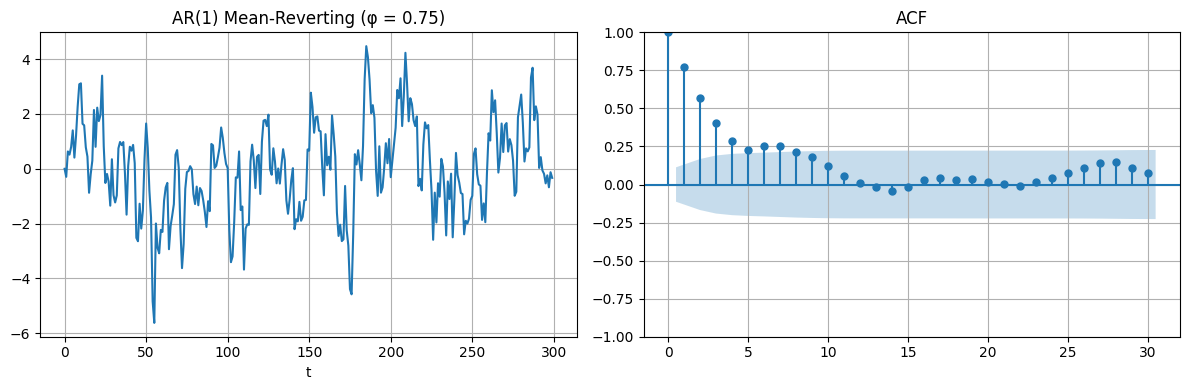

In [97]:
# bars shrinks smoothly as lag increases
# short memory -> lastest past values matters alot for today
# simple AR models works well
plot_series_and_acf(ar_series, f"AR(1) Mean-Reverting (φ = {phi})", lags=30)

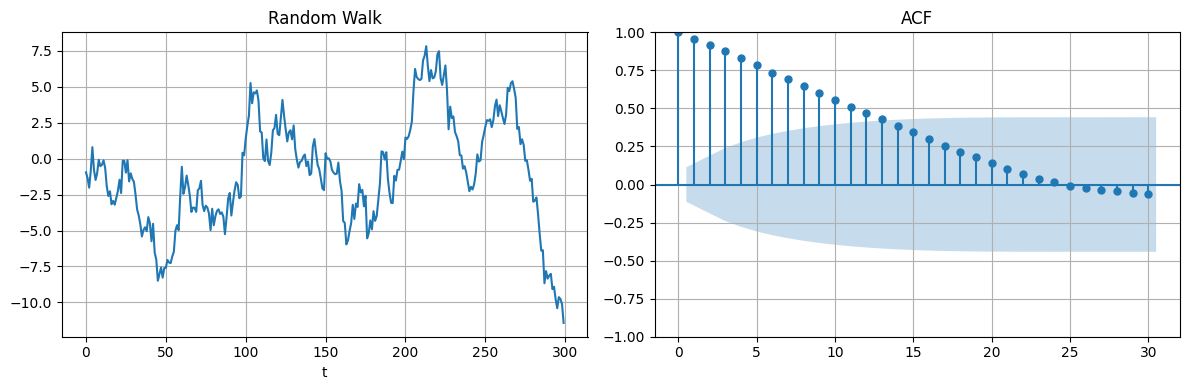

In [98]:
# very high autocorrelation
# slow decay
# difference first then forecast
plot_series_and_acf(random_walk, "Random Walk")